In [1]:
%pylab inline
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


/home/alex/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


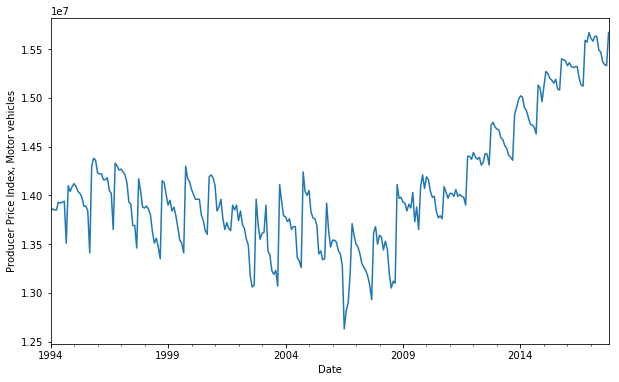

In [48]:
prod_price = pd.read_csv('BLSI-WPU1411-MX.csv',
                   index_col=['Date'], parse_dates=['Date'], dayfirst=True)
figsize(10,6)
prod_price = prod_price[::-1] # Reverse dataframe
prod_price = prod_price*100000
prod_price.Value.plot()
plt.ylabel('Producer Price Index, Motor vehicles')
pylab.show()

In [49]:
prod_price.head(100)

,Value
Date,
1994-01-31,13850000.0
1994-02-28,13860000.0
1994-03-31,13850000.0
1994-04-30,13850000.0
1994-05-31,13930000.0
1994-06-30,13920000.0
1994-07-31,13930000.0
1994-08-31,13940000.0
1994-09-30,13510000.0


In [50]:
prod_price.Value.describe()

count    2.860000e+02
mean     1.407517e+07
std      6.359233e+05
min      1.263000e+07
25%      1.365250e+07
50%      1.396000e+07
75%      1.435500e+07
max      1.567000e+07
Name: Value, dtype: float64

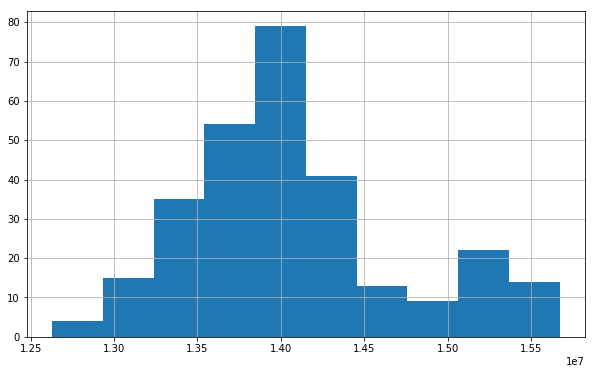

In [51]:
prod_price.Value.hist()

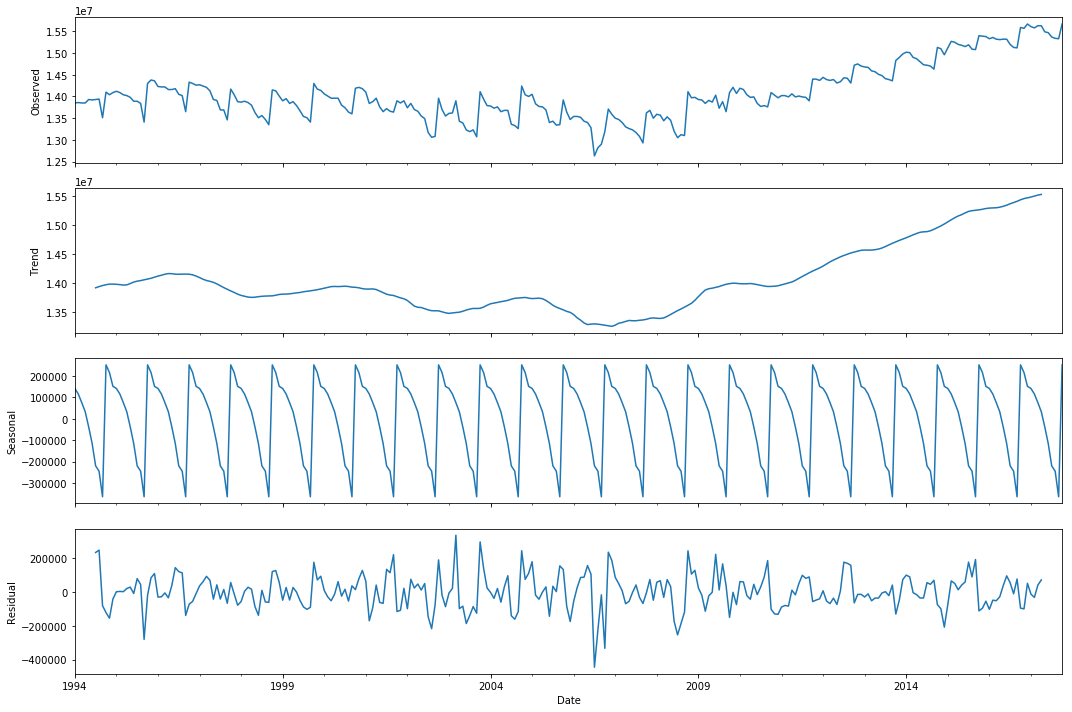

In [52]:
figsize(15,10)
decomposition = sm.tsa.seasonal_decompose(prod_price.Value)
fig = decomposition.plot()

In [53]:
print("Критерий Дики-Фуллера: p={0}".format(sm.tsa.stattools.adfuller(prod_price.Value)[1]))

Критерий Дики-Фуллера: p=0.9800783820154987


## Сезонность
Как видим, критерий Дики-Фуллера дает ~0.9, что значит, что ряд очень сильно нестационарен. Для того, чтобы отвергнуть гипотезу нестационарности, применим преобразование Бокса-Кокса и, если потребуется, сезонное и линейное дифференцирование ряда. 

/home/alex/anaconda3/lib/python3.5/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/home/alex/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/alex/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1852: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/home/alex/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/alex/anaconda3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


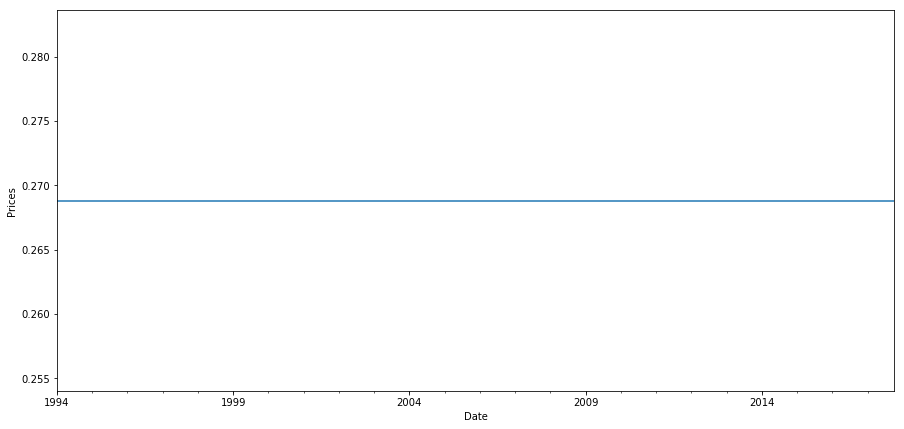

In [54]:
prod_price['Value_box'], lmbda = stats.boxcox(prod_price.Value)
figsize(15,7)
prod_price.Value_box.plot()
plt.ylabel('Prices')

In [55]:
prod_price.head(100)

,Value,Value_box
Date,,
1994-01-31,13850000.0,0.268811
1994-02-28,13860000.0,0.268811
1994-03-31,13850000.0,0.268811
1994-04-30,13850000.0,0.268811
1994-05-31,13930000.0,0.268811
1994-06-30,13920000.0,0.268811
1994-07-31,13930000.0,0.268811
1994-08-31,13940000.0,0.268811
1994-09-30,13510000.0,0.268811


In [8]:
print("Оптимальный параметр преобразования Бокса-Кокса: {0}".format(lmbda))
print("Критерий Дики-Фуллера: p={0}".format(sm.tsa.stattools.adfuller(prod_price.Value_box)[1]))

Оптимальный параметр преобразования Бокса-Кокса: -5.3237855840414445
Критерий Дики-Фуллера: p=0.860384216546563


### Как видим, преобразование Бокса-Кокса не помогло отвергнуть гипотезу нестационарности. Поэтому применим сезонное дифференцирование с лагом 12. Как видно из графика, сезон составляет 1 год.

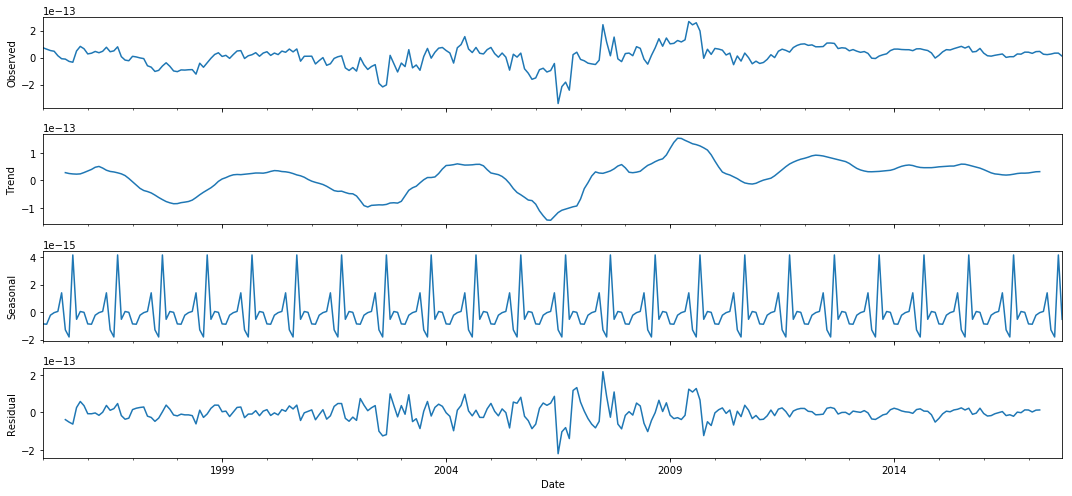

In [9]:
prod_price['Value_box_diff'] = prod_price.Value_box - prod_price.Value_box.shift(12)
decomposition_diff12 = sm.tsa.seasonal_decompose(prod_price.Value_box_diff[12:])
fig = decomposition_diff12.plot()

In [10]:
print("Критерий Дики-Фуллера (ряд после сезонного дифференцирования): p={0}".format(sm.tsa.stattools.adfuller(prod_price.Value_box_diff[12:])[1]))

Критерий Дики-Фуллера (ряд после сезонного дифференцирования): p=0.003708676167158238


### Сезонное дифференцирование отвергает гипотезу нестационарности. Но визуально все равно заметен тренд. Применим дифференцирование с лагом 1.

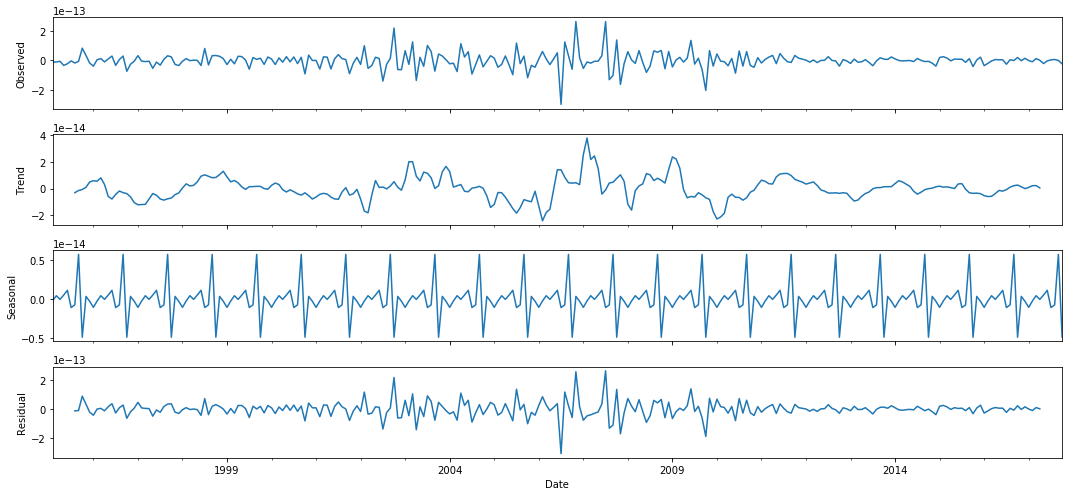

In [11]:
prod_price['Value_box_diff2'] = prod_price.Value_box_diff - prod_price.Value_box_diff.shift(1)
decomposition_diff12_1 = sm.tsa.seasonal_decompose(prod_price.Value_box_diff2[13:])
fig = decomposition_diff12_1.plot()

In [12]:
print("Критерий Дики-Фуллера(линейное дифференцирование): p={0}".format(sm.tsa.stattools.adfuller(prod_price.Value_box_diff2[13:])[1]))

Критерий Дики-Фуллера(линейное дифференцирование): p=1.754213178525953e-05


### Получили в итоге в среднем нулевой тренд и остатки, похожие на шум. Выраженная сезонность осталась.

# ACF, PACF
Для построения модели ARMA и схожих требуется определить коэффициенты $p, d, q$. Для этого рассмотрим автокорреляционную составляющую ряда:

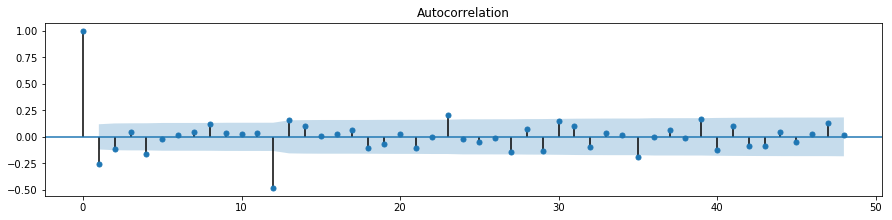

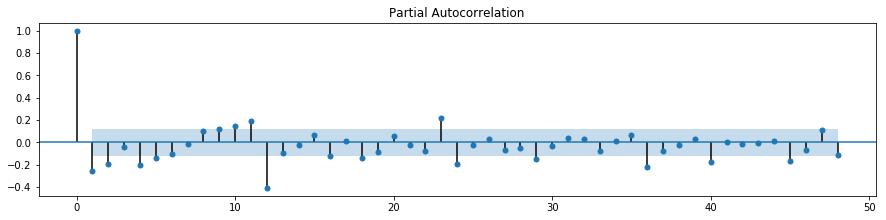

In [13]:
ax = plt.subplot(2, 1, 1)
sm.graphics.tsa.plot_acf(prod_price.Value_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(2, 1, 2)
sm.graphics.tsa.plot_pacf(prod_price.Value_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

* По коррелограмме ACF выбираем начальные приближения параметра $q:$ 1, 2
* По коррелограмме PACF выбираем начальные приближения параметра $p:$ 1, 4

В соотв. с: http://people.duke.edu/~rnau/arimrule.htm

* Первый лаг автокорреляционной функции отрицателен, значит, модель несколько чрезмерно дифференцирована => добавляем MA компоненту
* Было применено 1 сезонное дифференцирование и одно линейное дифференцирование ряда => d = D = 1. 
* В продифференцированной модели визуально заметна сезонность => добавим SAR компоненту

In [26]:
ps = range(0, 5)
qs = range(0, 3)
d = 1
Ps = range(0, 2)
Qs = range(0, 2)
D = 2

In [27]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

60

In [31]:
del best_model

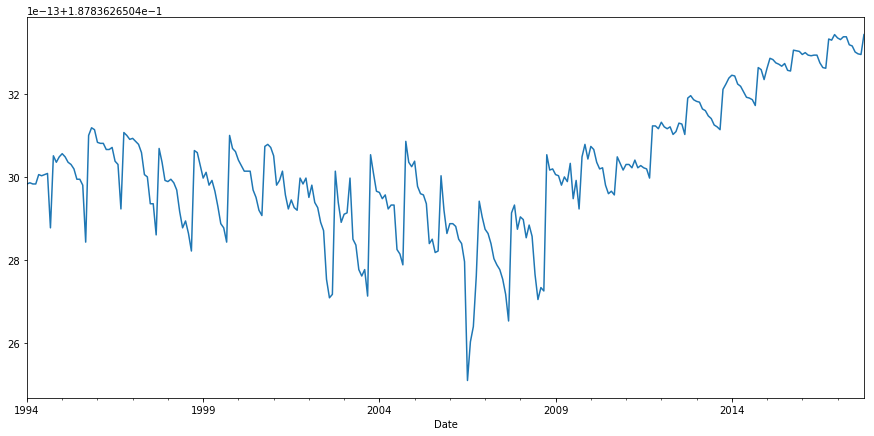

In [35]:
prod_price.Value_box.plot()

In [36]:
prod_price.shape

(286, 4)

In [32]:

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = sm.tsa.statespace.SARIMAX(prod_price.Value_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('Wrong params:', param)
        continue
    aic = model.aic
    print("AIC: ", aic)
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

Wrong params: (0, 0, 0, 0)
Wrong params: (0, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (0, 1, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (0, 2, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (1, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (1, 1, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (1, 2, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (2, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (2, 1, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (2, 2, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (3, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (3, 1, 0, 1)
AIC:  nan
AIC:  nan
Wrong params: (3, 2, 0, 0)
Wrong params: (3, 2, 0, 1)
Wrong params: (3, 2, 1, 0)
Wrong params: (3, 2, 1, 1)
AIC:  nan
Wrong params: (4, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (4, 1, 0, 1)
AIC:  nan
AIC:  nan
Wrong params: (4, 2, 0, 0)
Wrong params: (4, 2, 0, 1)
Wrong params: (4, 2, 1, 0)
Wrong params: (4, 2, 1, 1)


NameError: name 'best_model' is not defined

In [17]:
del parameters_list[1]

In [25]:
res, best_model = getBestModel(parameters_list, prod_price.Value_box, d, D)

Wrong params: (0, 0, 0, 0)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (0, 1, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (0, 2, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (1, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (1, 1, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (1, 2, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (2, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (2, 1, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (2, 2, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (3, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (3, 1, 0, 1)
AIC:  nan
AIC:  nan
Wrong params: (3, 2, 0, 0)
Wrong params: (3, 2, 0, 1)
Wrong params: (3, 2, 1, 0)
Wrong params: (3, 2, 1, 1)
AIC:  nan
Wrong params: (4, 0, 0, 1)
AIC:  nan
AIC:  nan
AIC:  nan
Wrong params: (4, 1, 0, 1)
AIC:  nan
AIC:  nan
Wrong params: (4, 2, 0, 0)
Wrong params: (4, 2, 0, 1)
Wrong params: (4, 2, 1, 0)
Wrong params: (4, 2, 1, 1)


UnboundLocalError: local variable 'best_model' referenced before assignment

In [21]:
res

[[(0, 0, 1, 0), nan],
 [(0, 0, 1, 1), nan],
 [(0, 1, 0, 0), nan],
 [(0, 1, 1, 0), nan],
 [(0, 1, 1, 1), nan],
 [(0, 2, 0, 0), nan],
 [(0, 2, 1, 0), nan],
 [(0, 2, 1, 1), nan],
 [(1, 0, 0, 0), nan],
 [(1, 0, 1, 0), nan],
 [(1, 0, 1, 1), nan],
 [(1, 1, 0, 0), nan],
 [(1, 1, 1, 0), nan],
 [(1, 1, 1, 1), nan],
 [(1, 2, 0, 0), nan],
 [(1, 2, 1, 0), nan],
 [(1, 2, 1, 1), nan],
 [(2, 0, 0, 0), nan],
 [(2, 0, 1, 0), nan],
 [(2, 0, 1, 1), nan],
 [(2, 1, 0, 0), nan],
 [(2, 1, 1, 0), nan],
 [(2, 1, 1, 1), nan],
 [(3, 0, 0, 0), nan],
 [(3, 0, 1, 0), nan],
 [(3, 0, 1, 1), nan],
 [(3, 1, 0, 0), nan],
 [(3, 1, 1, 0), nan],
 [(3, 1, 1, 1), nan],
 [(3, 2, 0, 0), nan],
 [(3, 2, 1, 0), nan],
 [(3, 2, 1, 1), nan],
 [(4, 0, 0, 0), nan],
 [(4, 0, 1, 0), nan],
 [(4, 0, 1, 1), nan],
 [(4, 1, 0, 0), nan],
 [(4, 1, 1, 0), nan],
 [(4, 1, 1, 1), nan]]

In [299]:
model = sm.tsa.statespace.SARIMAX(prod_price.Value_box, order=(1, 1, 1), 
                                            seasonal_order=(2, 1, 2, 12)).fit()

In [300]:
print(model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Value_box   No. Observations:                  286
Model:             SARIMAX(1, 1, 1)x(2, 1, 2, 12)   Log Likelihood                     nan
Date:                            Thu, 14 Dec 2017   AIC                                nan
Time:                                    17:03:28   BIC                                nan
Sample:                                01-31-1994   HQIC                               nan
                                     - 10-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2567          0        inf      0.000       0.257       0.257
ma.L1         -0.5723          0   

In [276]:
model.aic

nan